# Pendulo doble
**Integrantes**
- Integrante 1: Hissam Quintero Avilez
- Integrante 2: Arturo Velgis García
- Integrante 3: José Manuel Lira Aguas

## Objetivo general

Resolver las ecuaciones diferenciales que representan el movimiento de un pendulo doble utilizando la funcion odeint

## Objetivos específicos

Realizar una animación del movimiento de distintos pendulos dobles

## Ecuaciones pendulo doble:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/200px-Double-Pendulum.svg.png)


Las ecuaciones de posición de un pendulo doble como el que se muestra en la imagen son:

- $r_1=(x_1,y_1)= (L_1sin(\theta), -L1cos(\theta))$
- $r_2=(x_2,y_2)= (L_1sin(\theta)+L_2sin(\theta), -L1cos(\theta))-L_2cos(\theta)$

Las velocidades:
- $v_1=\dot{r_1}=(L_1\dot{\theta}cos(\theta), L_1\dot{\theta}sin(\theta))$
- $v_2=(L_1\dot{\theta}cos(\theta)+L_2\dot{\theta}cos(\theta), L1\dot{\theta}sin(\theta))+L_2\dot{\theta}sin(\theta)$

El lagraangiano es
$$L=T-U$$ 
$$T=\frac{1}{2}(m_1v_1^2+m_2v_2^2)$$
$$U=m_1gy_1+m_2gy_2$$
donde $g=9.81 m/s^2$ es la aceleracion de la gravedad

### Ecuacion de Euler-Lagrange
$$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta_1}$$ - \frac{\partial \mathcal{L}}{\partial \theta_1} = 0 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

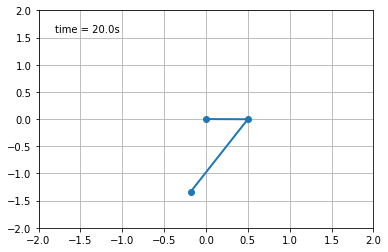

In [11]:
#aceleracion de la gravedad
G = 9.81
#longitudes y masas
L1, M1 = 0.5, 10
L2, M2 = 1.5, 1.0 


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*np.cos(del_)*np.cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*np.cos(del_)*np.cos(del_) + M2*G*np.sin(state[2])*np.cos(del_) + M2*L2*state[3]*state[3]*np.sin(del_) - (M1 + M2)*G*np.sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*np.sin(del_)*np.cos(del_) + (M1 + M2)*G*np.sin(state[0])*np.cos(del_) - (M1 + M2)*L1*state[1]*state[1]*np.sin(del_) - (M1 + M2)*G*np.sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*np.sin(y[:, 0])
y1 = -L1*np.cos(y[:, 0])

x2 = L2*np.sin(y[:, 2]) + x1
y2 = -L2*np.cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)), interval=25, blit=True, init_func=init)

ani.save('double_pendulum.mp4', fps=15)
#plt.show()